In [1]:
from auction import adExchange
from decisiontree import decisionTree, buildDecisionTree
from scipy.stats import wasserstein_distance
import collections
import bisect
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adex = adExchange(auction_type = "first")

In [3]:
adex.clearRecord()
adex.generateMultipleBidRecord(10000)

[[36.68028844905871,
  2,
  [1,
   4,
   9,
   4.556857450309141,
   1.343111232862427,
   4.054086339884413,
   3.8484293561930114,
   0.3246041063539488,
   2.009966876733224,
   3.1002720285996954],
  [(25.5431351041864, 0),
   (25.860805160084617, 1),
   (36.68028844905871, 2),
   (35.24997897608372, 3),
   (25.030311848658684, 4),
   (35.53586412400647, 5),
   (25.577600792843235, 6),
   (23.69558376206452, 7),
   (33.67288511006893, 8),
   (29.37268694513056, 9),
   (33.70427846157037, 10),
   (33.76796985520449, 11),
   (36.64157504001471, 12),
   (29.214317268190324, 13),
   (29.301329822414715, 14),
   (25.820125324821287, 15),
   (20.66500419437832, 16),
   (30.560157985800394, 17),
   (29.97446461087675, 18),
   (27.592093298878247, 19)]],
 [35.384160405081126,
  3,
  [1,
   3,
   7,
   1.8258535452019802,
   1.7829671346752085,
   2.851429016368386,
   2.6533364242904955,
   1.011783642968042,
   5.421779267654382,
   0.8345268295204715],
  [(32.050755742136026, 0),
   (31.

In [5]:
competitor = 3
data = adex.getCensoredRecord(competitor)
t = [k[1] for k in data]
sum(k[0] for k in data)

3060

In [6]:
decision_tree_trainer = buildDecisionTree(data, second_price_auction = False)

In [7]:
tree = decision_tree_trainer.train(max_height = 5)

In [8]:
tree.printTree()

0 {2} ... {2}
├── 4 [1, 1 ...  0]
│   ├── 3 [0, 0 ...  1]
│   │   ├── 7 [1, 1 ...  0]
│   │   │   ├── [1.4061848225021425e-05, 2.812369645004285e-05, 4.218554467506428e-05 ... 0.9958506566194126, 0.997925328309706, 0.9999999999999994]
│   │   │   └── [2.383267280018927e-05, 4.766534560037854e-05, 7.149801840056781e-05 ... 0.989778042485867, 0.9948890212429338, 1.0000000000000004]
│   │   └── 7 [1, 1 ...  0]
│   │       ├── [8.827023129233895e-05, 0.0001765404625846779, 0.00026481069387701686 ... 0.998324024601957, 0.9991620123009787, 1.0000000000000002]
│   │       └── [0.00018889995858684995, 0.0003777999171736999, 0.0005666998757605498 ... 0.9982684144378666, 0.9991342072189332, 0.9999999999999998]
│   └── 9 [1, 1 ...  1]
│       ├── 8 [0, 0 ...  0]
│       │   ├── [1.1125385201643125e-07, 2.225077040328625e-07, 3.3376155604929374e-07 ... 0.9311786771572558, 0.9655893385786277, 0.9999999999999997]
│       │   └── [3.7805234117933436e-05, 7.561046823586687e-05, 0.0001134157023538003 .

In [22]:
adex2 = adExchange(auction_type = "second")
adex2.clearRecord()
adex2.generateMultipleBidRecord(10000)

[[33.42837853110463,
  17,
  [1,
   4,
   4,
   3.2241459784825732,
   3.0340417012049925,
   1.1623106978031115,
   0.4822986296271374,
   2.2052045238620517,
   1.5445080525778088,
   6.439651103437337],
  [(20.68140388375789, 0),
   (28.9375065646344, 1),
   (32.08593912951072, 2),
   (23.330930571783412, 3),
   (24.921364889707363, 4),
   (27.757809232648487, 5),
   (27.060060503022456, 6),
   (28.653362838335084, 7),
   (27.64648848693073, 8),
   (31.608908075394744, 9),
   (24.528285983624865, 10),
   (29.345871179857554, 11),
   (31.22787024045977, 12),
   (24.933619021498917, 13),
   (32.862326707507606, 14),
   (33.42837853110463, 15),
   (25.992676414210678, 16),
   (33.602704636903646, 17),
   (33.32160472717632, 18),
   (23.72106896509771, 19)]],
 [35.688707790474666,
  1,
  [1,
   3,
   2,
   4.847437027984393,
   4.586682861158726,
   3.450083447136325,
   4.105143978845841,
   1.2946647702570302,
   6.30124553598361,
   2.0545281114620493],
  [(26.07065786458318, 0),
   

In [24]:
competitor2 = 17
data2 = adex2.getCensoredRecord(competitor2)
# t = [k[1] for k in data2]
sum(k[0] for k in data2)

3111

In [25]:
decision_tree_trainer2 = buildDecisionTree(data2)

In [26]:
tree2 = decision_tree_trainer2.train(max_height = 5, wasserstein = True)

In [27]:
tree2.printTree()

3 [1, 1 ...  0]
├── 0 {2} ... {2}
│   ├── 7 [0, 0 ...  1]
│   │   ├── 8 [0, 0 ...  1]
│   │   │   ├── [0.0, 0.0, 0.0 ... 0.9531549723626318, 0.9531549723626318, 0.9531549723626318]
│   │   │   └── [0.0, 0.0, 0.0 ... 1.0, 1.0, 1.0]
│   │   └── 9 [1, 1 ...  1]
│   │       ├── [0.0, 0.0, 0.0 ... 1.0, 1.0, 1.0]
│   │       └── [0.0, 0.0, 0.0 ... 0.7016281780076683, 0.7016281780076683, 0.7016281780076683]
│   └── 2 {1, 2 ...  6}
│       ├── 8 [1, 0 ...  0]
│       │   ├── [0.0, 0.0, 0.0 ... 0.7457366789773642, 0.7457366789773642, 0.7457366789773642]
│       │   └── [0.0, 0.0, 0.0 ... 1.0, 1.0, 1.0]
│       └── 6 [0, 1 ...  0]
│           ├── [0.0, 0.0, 0.0 ... 0.9119401225427923, 0.9119401225427923, 0.9119401225427923]
│           └── [0.0, 0.0, 0.0 ... 1.0, 1.0, 1.0]
└── 8 [1, 0 ...  0]
    ├── 5 [1, 1 ...  0]
    │   ├── 0 {1} ... {1}
    │   │   ├── [0.0, 0.0, 0.0 ... 1.0, 1.0, 1.0]
    │   │   └── [0.0, 0.0, 0.0 ... 1.0, 1.0, 1.0]
    │   └── 9 [0, 1 ...  0]
    │       ├── [0.0, 0.0, 0

In [9]:
record = adex.bid_record
inference_data = []
for k in record:
    inference_data.append([k[2], k[0]])

In [10]:
dist1 = tree.inference(inference_data[0])
dist2 = tree.inference(inference_data[1])

dist = collections.defaultdict(list)
for k in inference_data:
    dist[tuple(tree.inference(k))].append(k)

d = collections.defaultdict(list)
inf_data = []
for k in data:
    inf_data.append([k[-1]] + k[:-1])
for k in inf_data:
    d[tuple(tree.inference(k))].append(k)

In [11]:
num_price_bins = decision_tree_trainer.num_price_bins
price_bins = decision_tree_trainer.price_bins

def computeDataDistribution(data):
    count = [0 for _ in range(num_price_bins)]
    for k in data:
        price = k[1]
        pos = bisect.bisect_left(price_bins, price)
        count[pos] += 1
    total = len(data)
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    for i in range(1, len(count)):
        count[i] /= len(data)
    return count

In [12]:
print(wasserstein_distance(dist1, dist2))
def euclid(dist1, dist2):
    return sum([(dist1[i] - dist2[i]) * (dist1[i] - dist2[i]) for i in range(len(dist1))])

0.05717964851498402


In [13]:
k = list(dist.keys())[11]
leaf = d[k]
dist_t = computeDataDistribution(dist[k])
print(wasserstein_distance(dist_t, list(k)))
print(euclid(dist_t, list(k)))
winning_data = []
for kk in data:
    if kk[0]:
        winning_data.append([kk[-1], kk[1]])
#     else:
#         winning_data.append([kk[-1], kk[2]])
dist_c = computeDataDistribution(winning_data)
print(wasserstein_distance(dist_t, dist_c))
print(euclid(dist_t, dist_c))
win_data = []
for kk in leaf:
    if kk[1]:
        win_data.append([kk[0], kk[2]])
dist_w = computeDataDistribution(win_data)

0.06868655412806142
1.533278452038112
0.04536587824716483
0.6505338520694406


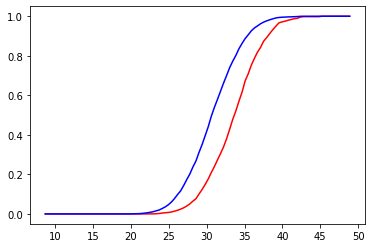

In [14]:
x = [2 * price_bins[0] - price_bins[1]] + price_bins
# plt.plot(x, list(k), 'r', x, dist_t, 'b', x, dist_c, 'g', x, dist_w, 'y')
plt.plot(x, list(k), 'r', x, dist_t, 'b')

In [15]:
d = collections.defaultdict(list)
inf_data = []
for k in data:
    inf_data.append([k[-1]] + k[:-1])
for k in inf_data:
    d[tuple(tree.inference(k))].append(k)
k = list(dist.keys())[1]

count = [[0, 0] for _ in range(num_price_bins)]
for k in leaf:
    pos = bisect.bisect_left(price_bins, k[-1])
    count[pos][1] += 1
    count[pos][0] += int(k[1])
prob = [k[0] / k[1] if k[1] != 0 else 0 for k in count]

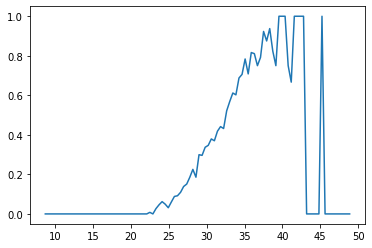

In [16]:
plt.plot(x, prob)

In [17]:
data

[[0,
  -1,
  29.564212007866786,
  [2,
   5,
   7,
   5.5192108976303995,
   2.1134397322773086,
   2.4894252615189414,
   3.001309462112873,
   0.9430410162387134,
   6.552473170712805,
   2.004429305895796]],
 [1,
  28.43815724437412,
  28.43815724437412,
  [1,
   4,
   8,
   1.648442923742007,
   4.16364857841102,
   2.0667102785382707,
   0.8682701248469282,
   0.921876331177125,
   1.3572015501244754,
   3.1355542382058386]],
 [0,
  -1,
  33.234987034920465,
  [1,
   3,
   7,
   5.667414457859846,
   1.6961690337775897,
   6.1193290152049045,
   6.5991974231131945,
   5.109417181314373,
   3.875850763958552,
   3.862658552901423]],
 [0,
  -1,
  31.013645657518136,
  [2,
   2,
   3,
   5.600421270141255,
   5.435346576198449,
   2.5635641719706657,
   6.647975027309489,
   3.1281430312184098,
   4.091654429696404,
   3.4959839973221207]],
 [0,
  -1,
  17.718280617117326,
  [1,
   1,
   2,
   3.5142115358571546,
   3.457983229461403,
   0.014555713833944347,
   2.1521821809818387,
 

In [18]:
record

[[31.952997958815974,
  17,
  [2,
   5,
   7,
   5.5192108976303995,
   2.1134397322773086,
   2.4894252615189414,
   3.001309462112873,
   0.9430410162387134,
   6.552473170712805,
   2.004429305895796],
  [(17.601249793836207, 0),
   (24.316449869891503, 1),
   (24.18738257175182, 2),
   (27.903123636799254, 3),
   (26.452831860206032, 4),
   (22.938590710151477, 5),
   (26.29201168735759, 6),
   (27.59414168446392, 7),
   (21.051296695274363, 8),
   (29.564212007866786, 9),
   (25.62345563689494, 10),
   (19.386557155513977, 11),
   (24.702778612404824, 12),
   (25.38618050623971, 13),
   (28.094346259357543, 14),
   (20.422551937779698, 15),
   (23.62376389713852, 16),
   (31.952997958815974, 17),
   (18.83659694063371, 18),
   (30.170339597405693, 19)]],
 [28.43815724437412,
  9,
  [1,
   4,
   8,
   1.648442923742007,
   4.16364857841102,
   2.0667102785382707,
   0.8682701248469282,
   0.921876331177125,
   1.3572015501244754,
   3.1355542382058386],
  [(18.532029369609887, 0),


1


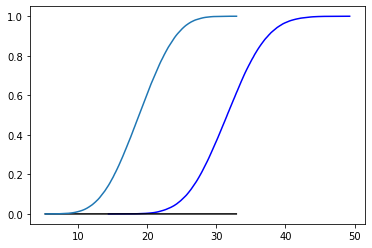

In [21]:
true_prices = [k[0] for k in record]
sorted_true_prices = sorted(true_prices)
user_idx = 13
censored_prices = [[k[0], 1] if k[1] == user_idx else [k[3][user_idx][0], 0] for k in record]
# censored_prices = [[k[0], 1] for k in record]
wp = []
for k in censored_prices:
    if k[1]:
        wp.append(k[0])
print(len(wp))
sorted_wp = sorted(wp)
left = sorted([k[0] for k in censored_prices])
x = [2 * this_price_bins[0] - this_price_bins[1]] + this_price_bins
dist_right = kme(censored_prices)
dist_left = kme(censored_prices, 0)
dist_average = [(dist_left[i] + dist_right[i]) / 2 for i in range(len(dist_left))]
# plt.plot(sorted_true_prices, [k / len(true_prices) for k in range(len(true_prices))], 'b', sorted_wp, [k / len(wp) for k in range(len(wp))], 'r', x, kme(censored_prices), 'black', left, [k / len(left) for k in range(len(left))], 'y', x, dist_average, 'g')
plt.plot(sorted_true_prices, [k / len(true_prices) for k in range(len(true_prices))], 'b', sorted_wp, [k / len(wp) for k in range(len(wp))], 'r', x, kme(censored_prices), 'black', left, [k / len(left) for k in range(len(left))])

In [20]:
num_this_price_bins = 1000
min_price = min([k[0] for k in censored_prices])
max_price = max([k[0] for k in censored_prices])
bin_width = (max_price - min_price) / num_this_price_bins
this_price_bins = [min_price + bin_width]
for _ in range(1, num_this_price_bins - 1):
    this_price_bins.append(this_price_bins[-1] + bin_width)

def kme(data, gap = -1):
    count = [[0, 0] for _ in range(num_this_price_bins)]
    for p, k in data:
        pos = bisect.bisect_left(this_price_bins, p)
        count[pos][0] += k
        count[pos][1] += 1 - k
    loseprob = [1]
    ni = len(data)
    for i in range(len(count)):
        di = count[i][0]
        if gap != -1:
            if i >= gap:
                di += count[i - gap][1]*0.5
                ni += count[i - gap][1]
        if i > 1:
            ni -= count[i - 2][1]
        if i:
            ni -= count[i - 1][0]
        if ni != 0:
            loseprob.append(loseprob[-1] * (1 - di / ni))
        else:
            loseprob.append(loseprob[-1])
        if gap != -1:
            if i >= gap:
                ni -= count[i - gap][1]
    winprob = [1 - k for k in loseprob]
    return winprob[1:]

def kme2(data, gap = -1):
    count = [[0, 0] for _ in range(num_this_price_bins)]
    for p, k in data:
        pos = bisect.bisect_left(this_price_bins, p)
        count[pos][0] += k
        count[pos][1] += 1 - k
    for i in range(len(count)):
        sm = sum(count[i])
        if sm:
            count[i] = [count[i][0] / sm, count[i][1] / sm]
    loseprob = [1]
    ni = sum([sum(k) for k in count])
    for i in range(len(count)):
        di = count[i][0]
        if gap != -1:
            if i >= gap:
                di += count[i - gap][1]
#         if i > 1:
#             ni -= count[i - 2][0]
        if i:
            ni -= count[i - 1][1] + count[i - 1][0]
        if ni != 0:
            loseprob.append(loseprob[-1] * (1 - di / ni))
        else:
            loseprob.append(loseprob[-1])
    winprob = [1 - k for k in loseprob]
    return winprob[1:]

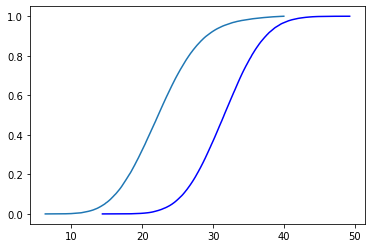

In [26]:
import math
import random
win_censor = []
lose_censor = []
for k in censored_prices:
    if k[1]:
        win_censor.append(k[0])
    else:
        lose_censor.append(k[0])
ave_win = sum(win_censor) / len(win_censor)
ave_lose = sum(lose_censor) / len(lose_censor)
dd = ave_win - ave_lose
mu = math.log(dd)
sigma = math.log(2) ** 0.5
new_lose = [k + random.lognormvariate(mu, sigma) for k in lose_censor]
new_total = win_censor + new_lose
sorted_new_total = sorted(new_total)
tmp_new_total = []
for k in sorted_new_total:
    if k < 40:
        tmp_new_total.append(k)
plt.plot(tmp_new_total, [k / len(tmp_new_total) for k in range(len(tmp_new_total))], sorted_true_prices, [k / len(true_prices) for k in range(len(true_prices))], 'b')

1
2.7873256847238075 21.59436002234387


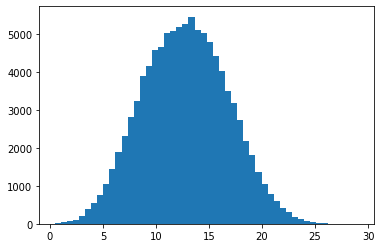

In [23]:
import statistics
diff = []
idx = 13
a, b = [], []
for i in range(len(record[:])):
    if record[i][1] != idx:
        diff.append(record[i][0] - record[i][3][idx][0])
        b.append(record[i][3][idx][0])
    else:
        a.append(record[i][3][idx][0])
plt.hist(diff, bins=50)
print(len(a))
print(sum(a) / len(a) - sum(b) / len(b), statistics.median(a))

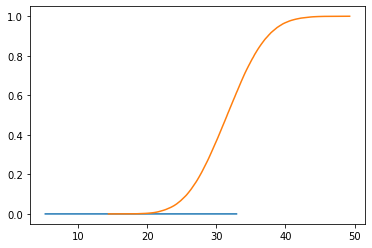

In [27]:
tmp = sorted(censored_prices)
loseprob = [1]
ni = len(tmp)
for i in range(len(tmp)):
    if tmp[i][1]:
        loseprob.append(loseprob[-1] * (1 - 1 / ni))
    else:
        loseprob.append(loseprob[-1])
    ni -= 1
winprob = [1 - k for k in loseprob]
winprob = winprob[1:]
plt.plot([k[0] for k in tmp], winprob, sorted_true_prices, [k / len(true_prices) for k in range(len(true_prices))])

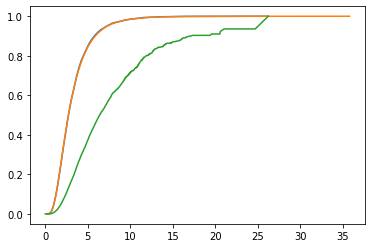

In [28]:
true_data = [random.lognormvariate(1, 0.6) for _ in range(100000)]
sorted_true_data = sorted(true_data)
censored_data = []
for k in true_data:
    if random.random() < 0.9:
        censored_data.append([random.random() * k, 0])
    else:
        censored_data.append([k, 1])
tmp = sorted(censored_data)
loseprob = [1]
ni = len(tmp)
for i in range(len(tmp)):
    if tmp[i][1]:
        loseprob.append(loseprob[-1] * (1 - 1 / ni))
    else:
        loseprob.append(loseprob[-1])
    ni -= 1
winprob = [1 - k for k in loseprob]
winprob = winprob[1:]

winevent = []
for k in censored_data:
    if k[1]:
        winevent.append(k[0])
sorted_winevent = sorted(winevent)
plt.plot(sorted_winevent, [k / len(sorted_winevent) for k in range(len(sorted_winevent))], sorted_true_data, [k / len(sorted_true_data) for k in range(len(sorted_true_data))], [k[0] for k in tmp], winprob)

(array([3.000e+00, 5.000e+00, 6.000e+00, 1.600e+01, 2.800e+01, 3.200e+01,
        5.400e+01, 5.900e+01, 9.400e+01, 1.120e+02, 1.180e+02, 1.660e+02,
        1.790e+02, 2.450e+02, 2.550e+02, 3.290e+02, 3.380e+02, 3.920e+02,
        4.030e+02, 4.830e+02, 5.470e+02, 5.890e+02, 5.880e+02, 5.990e+02,
        6.440e+02, 6.160e+02, 7.440e+02, 7.700e+02, 7.870e+02, 7.810e+02,
        9.180e+02, 8.930e+02, 8.790e+02, 9.080e+02, 9.130e+02, 9.610e+02,
        9.920e+02, 9.600e+02, 1.036e+03, 9.540e+02, 1.018e+03, 1.025e+03,
        9.930e+02, 9.940e+02, 1.054e+03, 9.910e+02, 1.038e+03, 1.079e+03,
        1.069e+03, 1.047e+03, 1.033e+03, 1.033e+03, 1.076e+03, 9.960e+02,
        1.042e+03, 1.042e+03, 9.940e+02, 9.670e+02, 1.020e+03, 9.800e+02,
        9.390e+02, 9.730e+02, 9.460e+02, 9.810e+02, 9.810e+02, 9.760e+02,
        9.000e+02, 8.770e+02, 8.540e+02, 8.400e+02, 8.310e+02, 9.050e+02,
        8.370e+02, 8.790e+02, 8.020e+02, 7.690e+02, 7.800e+02, 7.880e+02,
        7.710e+02, 7.900e+02, 7.890e+0

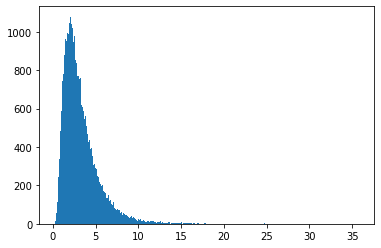

In [29]:
plt.hist(true_data, bins=1000)

In [69]:
import random
import matplotlib.pyplot as plt
from utils import turnbull
%matplotlib inline

second_data = [random.lognormvariate(2, 0.3) for _ in range(100000)]
sorted_second_data = sorted(second_data)
# censored_data = [[random.random() * 4 + 4, 0] for _ in range(len(second_data))]
censored_data = [[random.expovariate(0.2), 0] for _ in range(len(second_data))]
# censored_data = [[random.randint(1, 3) * random.random(), 0] for _ in range(len(second_data))]
# censored_data = [[random.choice([2, 3, 4, 5]) + random.random(), 0] for _ in range(len(second_data))]
true_data = []
for i in range(len(second_data)):
    if second_data[i] < censored_data[i][0]:
        true_data.append(second_data[i])
        censored_data[i][1] = 1
        censored_data[i][0] = second_data[i]
    else:
        true_data.append(second_data[i])
        
tmp = sorted(censored_data)
loseprob = [1]
ni = len(tmp)
for i in range(len(tmp)):
    if tmp[i][1]:
        loseprob.append(loseprob[-1] * (1 - 1 / ni))
    else:
        loseprob.append(loseprob[-1])
    ni -= 1
winprob = [1 - k for k in loseprob]
winprob = winprob[1:]

winevent = []
loseevent = []
for k in censored_data:
    if k[1]:
        winevent.append(k[0])
    else:
        loseevent.append(k[0])
print(len(winevent))
wldiff = sum(winevent) / len(winevent) - sum(loseevent) / len(loseevent)
print(wldiff)

num_this_price_bins = 1000
min_price = min([k[0] for k in censored_data])
max_price = max([k[0] for k in censored_data])
bin_width = (max_price - min_price) / num_this_price_bins
this_price_bins = [min_price + bin_width]
for _ in range(1, num_this_price_bins - 1):
    this_price_bins.append(this_price_bins[-1] + bin_width)

def kme(data, gap = -1):
    count = [[0, 0] for _ in range(num_this_price_bins)]
    for p, k in data:
        pos = bisect.bisect_left(this_price_bins, p)
        count[pos][0] += k
        count[pos][1] += 1 - k
    loseprob = [1]
    ni = len(data)
    for i in range(len(count)):
        di = count[i][0]
        if gap != -1:
            if i >= gap:
                di += count[i - gap][1] * 0.5
                ni += count[i - gap][1]
        if i > 1:
            ni -= count[i - 2][1]
        if i:
            ni -= count[i - 1][0]
        if ni != 0:
            loseprob.append(loseprob[-1] * (1 - di / ni))
        else:
            loseprob.append(loseprob[-1])
        if gap != -1:
            if i >= gap:
                ni -= count[i - gap][1]
    winprob = [1 - k for k in loseprob]
    return winprob[1:]

def binprob(data):
    count = [[0, 0] for _ in range(num_this_price_bins)]
    for p, k in data:
        pos = bisect.bisect_left(this_price_bins, p)
        count[pos][0] += k
        count[pos][1] += 1 - k
    winprob = [0]
    for i, j in count:
        if i + j == 0:
            winprob.append(winprob[-1])
        else:
            winprob.append(max(winprob[-1], i / (i + j)))
    return winprob[1:]

x = [2 * this_price_bins[0] - this_price_bins[1]] + this_price_bins
# plt.plot(x, kme(censored_data, gap = int(wldiff / bin_width)), 'yellow')
# plt.plot(x, binprob(censored_data), 'orange')

xx, dist = turnbull(censored_data, epsilon = 0.1)
plt.plot(xx, dist, 'purple')

sorted_second_data = sorted(second_data)
sorted_true_data = sorted(true_data)
sorted_winevent = sorted(winevent)
sorted_true_data = sorted_true_data[:90000]
sorted_second_data = sorted_second_data[:90000]
plt.plot(sorted_winevent, [k / len(sorted_winevent) for k in range(len(sorted_winevent))], 'green')
plt.plot(sorted_true_data, [k / len(sorted_true_data) for k in range(len(sorted_true_data))], 'blue')
# plt.plot([k[0] for k in tmp], winprob, 'black')
plt.plot(x, kme(censored_data), 'black')
plt.plot(sorted_second_data, [k / len(sorted_second_data) for k in range(len(sorted_second_data))], 'red')

23269
3.901112017930574


ZeroDivisionError: float division by zero

(array([5.7100e+02, 1.6550e+03, 3.2230e+03, 5.3700e+03, 7.8950e+03,
        9.9240e+03, 1.1860e+04, 1.3571e+04, 1.0345e+04, 6.5970e+03,
        5.6670e+03, 4.8880e+03, 3.9700e+03, 3.2840e+03, 2.5510e+03,
        2.0090e+03, 1.5410e+03, 1.2010e+03, 9.0000e+02, 7.3100e+02,
        5.8200e+02, 3.9700e+02, 3.1700e+02, 2.3600e+02, 1.7900e+02,
        1.3200e+02, 9.7000e+01, 7.6000e+01, 6.5000e+01, 3.6000e+01,
        2.4000e+01, 3.2000e+01, 1.1000e+01, 2.0000e+01, 1.1000e+01,
        1.3000e+01, 4.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 4.00115858,  4.47539296,  4.94962735,  5.42386173,  5.89809612,
         6.3723305 ,  6.84656489,  7.32079927,  7.79503366,  8.26926804,
         8.74350243,  9.21773681,  9.6919712 , 10.16620558, 10.64043997,
        11.11467435, 11.58890874, 12.06314312, 12.53737751, 13.01161189,
        13.48584628, 13.96

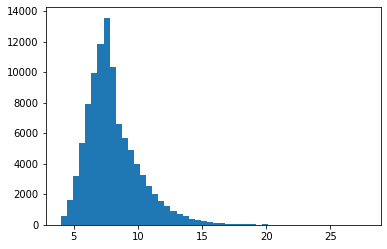

In [47]:
plt.hist(true_data, 50)

(array([1.700e+01, 1.220e+02, 5.420e+02, 1.491e+03, 3.024e+03, 5.206e+03,
        6.920e+03, 8.683e+03, 9.464e+03, 9.448e+03, 9.188e+03, 8.324e+03,
        7.499e+03, 6.270e+03, 5.345e+03, 4.254e+03, 3.487e+03, 2.628e+03,
        2.056e+03, 1.497e+03, 1.132e+03, 8.620e+02, 7.190e+02, 4.850e+02,
        3.410e+02, 2.710e+02, 1.900e+02, 1.400e+02, 1.050e+02, 7.800e+01,
        5.900e+01, 3.500e+01, 2.900e+01, 2.100e+01, 2.000e+01, 1.500e+01,
        1.200e+01, 6.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.96317941,  2.47817338,  2.99316735,  3.50816132,  4.02315529,
         4.53814925,  5.05314322,  5.56813719,  6.08313116,  6.59812513,
         7.1131191 ,  7.62811306,  8.14310703,  8.658101  ,  9.17309497,
         9.68808894, 10.20308291, 10.71807687, 11.23307084, 11.74806481,
        12.26305878, 12.77805275, 13.29304672, 13.80804068, 14.32303465,
        14.

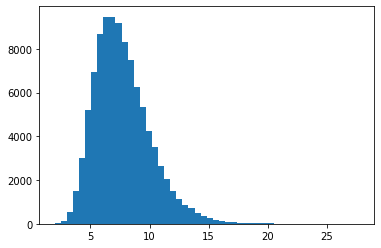

In [48]:
plt.hist(second_data, 50)

In [33]:
sorted_second_data[-2]

10.841587997372152

In [34]:
sorted_true_data[-1]

29.999663280695717

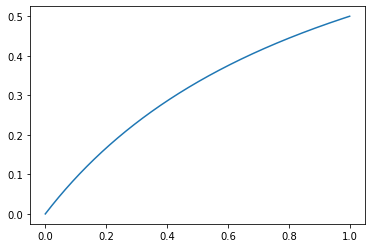

In [35]:
x0 = [k / 10000 for k in range(10000)]
y0 = [k / (k + 1) for k in x0]
plt.plot(x0, y0)

In [28]:
1+2

3

In [29]:
import numpy as np

In [35]:
tmp = np.ones(10)

In [33]:
tmp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])